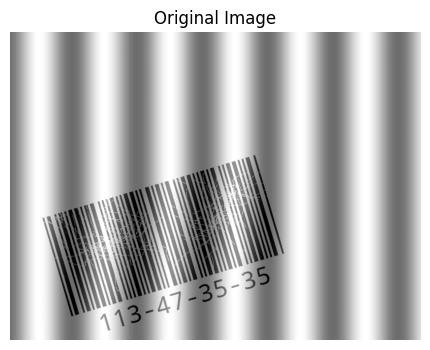

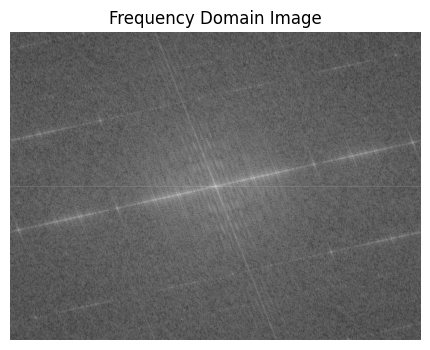

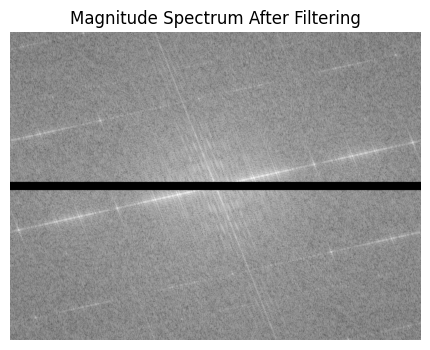

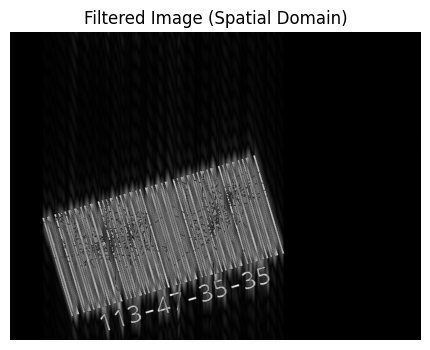

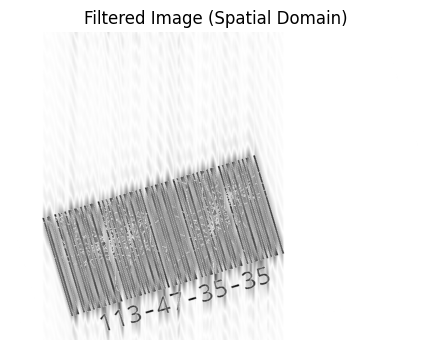

In [127]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import numpy.fft as fft

# Load the image from file
img_path = "test cases/11 - bayza 5ales di bsara7a.jpg"
image = Image.open(img_path).convert('L')  # Convert to grayscale

# Display the original image
plt.figure(figsize=(6, 4))
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.axis('off')
plt.show()

def transform_image_to_frequency_domain(image):
    # Convert image to numpy array
    img_array = np.array(image)
    
    # Apply Fourier Transform
    f_transform = fft.fft2(img_array)
    
    # Shift the zero frequency component to the center
    f_transform_centered = fft.fftshift(f_transform)
    
    # Magnitude Spectrum
    magnitude_spectrum = np.log(np.abs(f_transform_centered) + 1)
    
    return f_transform_centered, magnitude_spectrum

# Perform the transformation
f_transform_centered, magnitude_spectrum = transform_image_to_frequency_domain(image)

# Plot the frequency domain image
plt.figure(figsize=(6, 4))
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title("Frequency Domain Image")
plt.axis('off')
plt.show()

def apply_band_stop_filter(f_transform, size=8):
    rows, cols = f_transform.shape
    crow, ccol = rows//2, cols//2

    # Create a mask with True values at indices that are outside the band-stop area
    mask = np.ones((rows, cols), dtype=bool)

    # Horizontal band-stop
    mask[crow-size:crow+size, :] = False

    # Apply the mask to the frequency transform
    f_transform_filtered = f_transform * mask
    
    return f_transform_filtered



# Apply the band-stop filter
f_transform_filtered = apply_band_stop_filter(f_transform_centered)

magnitude_spectrum_filtered = np.log(np.abs(f_transform_filtered) + 1)

# Display the magnitude spectrum
plt.figure(figsize=(6, 4))
plt.imshow(magnitude_spectrum_filtered, cmap='gray')
plt.title("Magnitude Spectrum After Filtering")
plt.axis('off')
plt.show()


# Inverse FFT to convert back to spatial domain
img_back = fft.ifft2(fft.ifftshift(f_transform_filtered))
img_back = np.abs(img_back)

def invert_image_colors(image):
    # Convert the image to a numpy array
    img_array = np.array(image)
    
    # Invert the image colors
    inverted_img = 255 - img_array
    
    return inverted_img

# Invert the colors of the original image
inverted_colors_image = invert_image_colors(img_back)

# Plot the filtered image in the spatial domain
plt.figure(figsize=(6, 4))
plt.imshow(img_back, cmap='gray')
plt.title("Filtered Image (Spatial Domain)")
plt.axis('off')
plt.show()

plt.figure(figsize=(6, 4))
plt.imshow(inverted_colors_image, cmap='gray')
plt.title("Filtered Image (Spatial Domain)")
plt.axis('off')
plt.show()






In [123]:
# from PIL import Image
# import numpy as np
# import matplotlib.pyplot as plt

# # Load an image and convert it to grayscale
# image_path = "test cases/11 - bayza 5ales di bsara7a.jpg"  # Replace with your image path
# img = Image.open(image_path).convert('L')
# img_array = np.array(img)

# # Compute the 2D discrete Fourier Transform
# dft = np.fft.fft2(img_array)

# # Shift the zero-frequency component to the center of the spectrum.
# dft_shift = np.fft.fftshift(dft)

# # Compute the magnitude spectrum and scale it for better visualization
# magnitude_spectrum = np.abs(dft_shift)**0.5

# # Plot
# fig, axes = plt.subplots(figsize=(20, 5), nrows=1, ncols=4)
# axes[0].imshow(img_array, cmap='gray')
# axes[0].set_title("Original Image")

# # If you need to plot a specific row, like the first row of the image
# grad_row_scaled = img_array[0, :]  # Example: first row of the image array
# axes[1].plot(grad_row_scaled)
# axes[1].set_title("First Row of the Image")

# axes[2].imshow(magnitude_spectrum, cmap='gray')
# axes[2].set_title("Magnitude Spectrum")
# axes[2].set(xticks=[0, img_array.shape[1]//2, img_array.shape[1]-1], xticklabels=[-img_array.shape[1]//2, 0, img_array.shape[1]//2-1])
# axes[2].set(yticks=[0, img_array.shape[0]//2, img_array.shape[0]-1], yticklabels=[-img_array.shape[0]//2, 0, img_array.shape[0]//2-1])

# # Zoom into the center of the magnitude spectrum
# center_region = (slice(img_array.shape[0]//2-4, img_array.shape[0]//2+5), slice(img_array.shape[1]//2-4, img_array.shape[1]//2+5))
# axes[3].imshow(magnitude_spectrum[center_region], cmap='gray')
# axes[3].set_title("Center Zoom of the Magnitude Spectrum")
# axes[3].axis('on')  # Shows the axis ticks

# plt.show()


Ahmed hossam's code 

C:\Users\Saleh Ahmed\AppData\Local\Temp\ipykernel_13000\2587221716.py:44: RuntimeWarning: invalid value encountered in sqrt
  distance_from_center = np.sqrt((x - center_col)*2 + (y - center_row)*2)


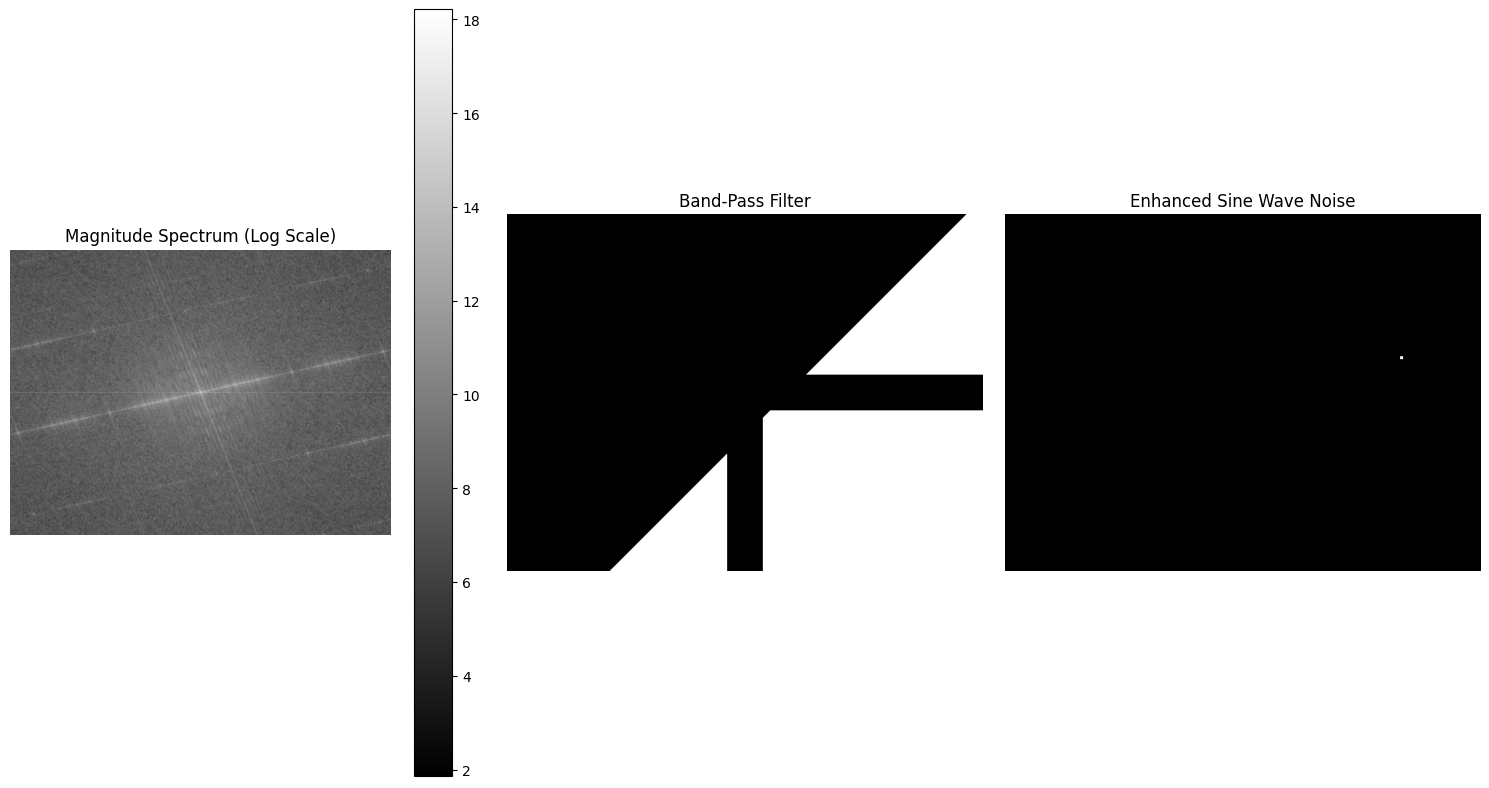

Noise sine waves detected.


In [ ]:
# from PIL import Image
# import matplotlib.pyplot as plt
# import numpy as np
# import numpy.fft as fft
# import cv2




# def detect_noise_sine_waves(image, z_score_threshold=2.5, low_freq_cutoff_ratio=0.02, high_freq_cutoff_ratio=0.5):
#         """
#         Detect noise sine waves in an image while avoiding structured patterns (e.g., barcodes).

#         Parameters:
#             image (numpy.ndarray): Input image (grayscale).
#             z_score_threshold (float): Z-score threshold for detecting noise.
#             low_freq_cutoff_ratio (float): Low frequency cutoff as a ratio of image size.
#             high_freq_cutoff_ratio (float): High frequency cutoff as a ratio of image size.

#         Returns:
#             numpy.ndarray: Binary mask highlighting detected sine wave noise.
#         """
#         # Convert the image to grayscale if it is not
#         gray_image = image

#         # Step 1: Apply FFT to transform the image to the frequency domain
#         dft = np.fft.fft2(gray_image)
#         dft_shift = np.fft.fftshift(dft)
#         magnitude_spectrum = np.abs(dft_shift)

#         # Step 2: Compute z-scores of the magnitude spectrum
#         mean_mag = np.mean(magnitude_spectrum)
#         std_mag = np.std(magnitude_spectrum)
#         z_scores = (magnitude_spectrum - mean_mag) / std_mag

#         # Step 3: Create a frequency filter
#         rows, cols = gray_image.shape
#         center_row, center_col = rows // 2, cols // 2
#         low_freq_cutoff = int(min(rows, cols) * low_freq_cutoff_ratio)
#         high_freq_cutoff = int(min(rows, cols) * high_freq_cutoff_ratio)

#         # Create a circular band-pass filter
#         y, x = np.ogrid[:rows, :cols]
#         distance_from_center = np.sqrt((x - center_col)*2 + (y - center_row)*2)
#         band_pass_filter = (distance_from_center >= low_freq_cutoff) & (distance_from_center <= high_freq_cutoff)

#         # Exclude central frequencies (structured patterns like barcodes)
#         exclusion_width = int(min(rows, cols) * 0.05)  # Exclude a small width around central axes
#         band_pass_filter[center_row - exclusion_width:center_row + exclusion_width, :] = False
#         band_pass_filter[:, center_col - exclusion_width:center_col + exclusion_width] = False

#         # Apply the band-pass filter to the z-score mask
#         sine_wave_mask = (z_scores > z_score_threshold) & band_pass_filter

#         # Step 4: Enhance the detected regions using dilation
#         kernel = np.ones((5, 5), np.uint8)  # Adjust kernel size to control dilation
#         enhanced_mask = cv2.dilate(sine_wave_mask.astype(np.uint8), kernel, iterations=1)

#         # Step 5: Create an output image highlighting the sine wave noise
#         sine_wave_image = np.zeros_like(gray_image)
#         sine_wave_image[enhanced_mask > 0] = 255  # Highlight detected noise patterns

#         # DEBUG: Display the magnitude spectrum, filter, and detection
#         plt.figure(figsize=(15, 8))

#         plt.subplot(1, 3, 1)
#         plt.title("Magnitude Spectrum (Log Scale)")
#         plt.imshow(np.log(1 + magnitude_spectrum), cmap='gray')
#         plt.colorbar()
#         plt.axis('off')

#         plt.subplot(1, 3, 2)
#         plt.title("Band-Pass Filter")
#         plt.imshow(band_pass_filter, cmap='gray')
#         plt.axis('off')

#         plt.subplot(1, 3, 3)
#         plt.title("Enhanced Sine Wave Noise")
#         plt.imshow(sine_wave_image, cmap='gray')
#         plt.axis('off')

#         plt.tight_layout()
#         plt.show()

#         # Check if any sine waves were detected
#         if np.any(enhanced_mask):
#             print("Noise sine waves detected.")
#             #detected_noises.append('sine_wave')
#         else:
#             print("No noise sine waves detected.")

#         return sine_wave_image

# # Step 1: Load an image
# img_path = 'test cases/11 - bayza 5ales di bsara7a.jpg'  # Replace this with your image path
# image = Image.open(img_path)

# # Step 2: Convert to grayscale
# if image.mode != 'L':
#     gray_image = image.convert('L')
# else:
#     gray_image = image

# # Convert the PIL Image to a numpy array for processing
# gray_image_np = np.array(gray_image)

# # Step 3: Call the detect_noise_sine_waves function
# sine_wave_detection_output = detect_noise_sine_waves(gray_image_np)


